In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

# Show top rows
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [2]:
# Filter only India data
df_india = df[df['Country'] == 'India'].copy()
df_india.head()

,Date,Country,Confirmed,Recovered,Deaths
65280,2020-01-22,India,0,0,0
65281,2020-01-23,India,0,0,0
65282,2020-01-24,India,0,0,0
65283,2020-01-25,India,0,0,0
65284,2020-01-26,India,0,0,0


In [3]:
# Convert 'Date' column to datetime
df_india['Date'] = pd.to_datetime(df_india['Date'])

In [4]:
# Calculate daily new confirmed cases
df_india['DailyConfirmed'] = df_india['Confirmed'].diff().fillna(0)

# Optional: fix negative values (data anomalies)
df_india['DailyConfirmed'] = df_india['DailyConfirmed'].apply(lambda x: x if x >= 0 else 0)

df_india.tail()

,Date,Country,Confirmed,Recovered,Deaths,DailyConfirmed
66091,2022-04-12,India,43038016,0,521736,1088.0
66092,2022-04-13,India,43039023,0,521737,1007.0
66093,2022-04-14,India,43039972,0,521743,949.0
66094,2022-04-15,India,43040947,0,521747,975.0
66095,2022-04-16,India,43042097,0,521751,1150.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


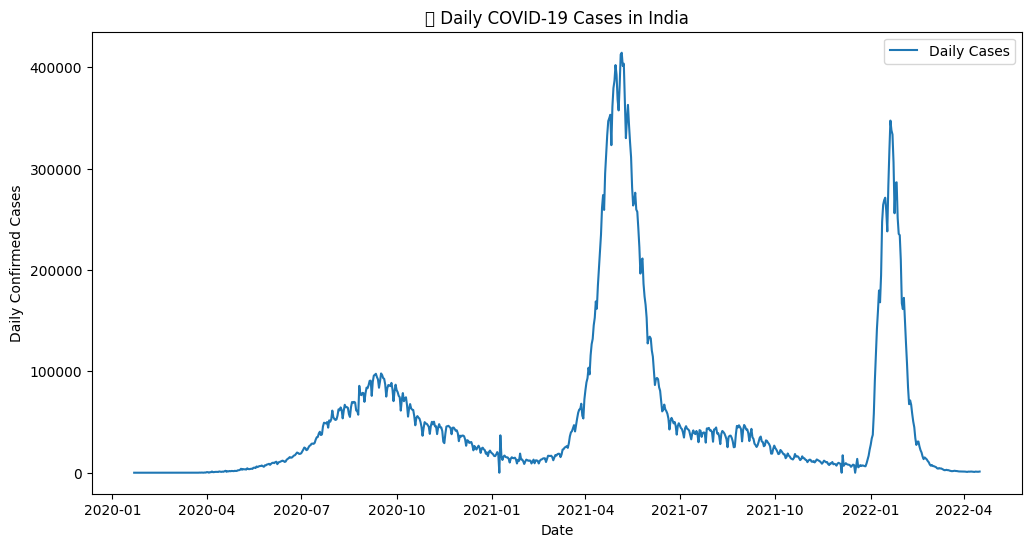

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df_india, x='Date', y='DailyConfirmed', label='Daily Cases')
plt.title("📈 Daily COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("Daily Confirmed Cases")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


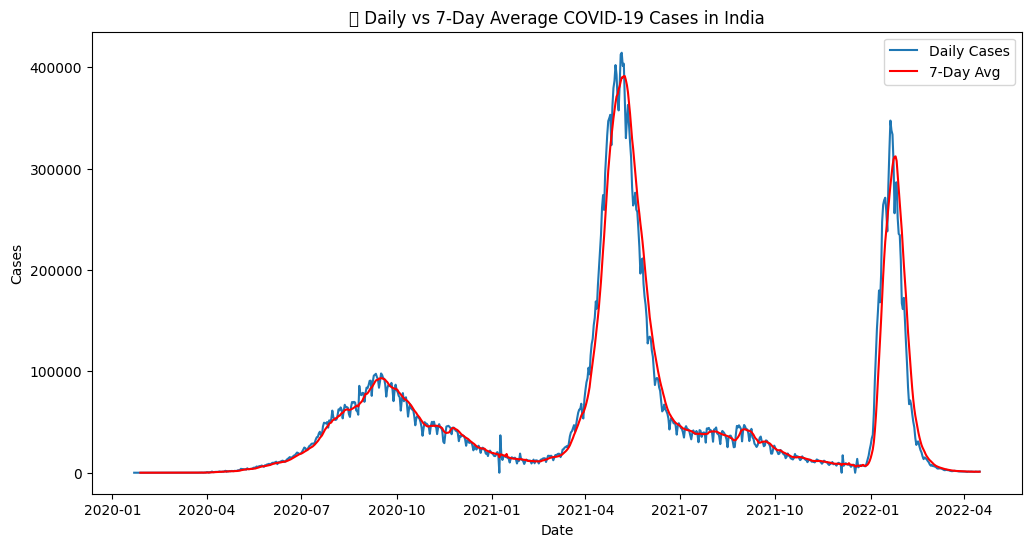

In [6]:
# Add 7-day rolling average
df_india['7DayAvg'] = df_india['DailyConfirmed'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='DailyConfirmed', data=df_india, label='Daily Cases')
sns.lineplot(x='Date', y='7DayAvg', data=df_india, label='7-Day Avg', color='red')
plt.title("📊 Daily vs 7-Day Average COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


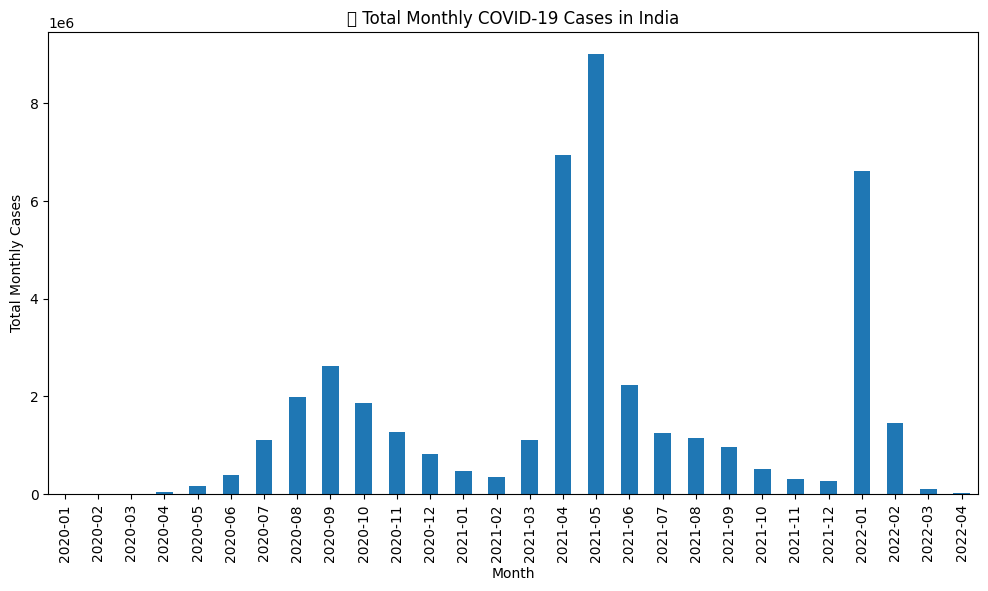

In [7]:
df_india['Month'] = df_india['Date'].dt.to_period('M')
monthly_cases = df_india.groupby('Month')['DailyConfirmed'].sum()

monthly_cases.plot(kind='bar', figsize=(12,6), title="🗓️ Total Monthly COVID-19 Cases in India")
plt.ylabel("Total Monthly Cases")
plt.show()